## Pandas 数据处理基础

#### 介绍

Pandas 是非常著名的开源数据处理库，我们可以通过它完成对数据集进行快速读取、转换、过滤、分析等一系列操作。除此之外，Pandas 拥有强大的缺失数据处理与数据透视功能，可谓是数据预处理中的必备利器。

#### 知识点

- 数据类型
- 数据读取
- 数据选择
- 数据删减
- 数据填充

---

<img width='400px' src="https://doc.shiyanlou.com/courses/uid214893-20200506-1588754125824">

Pandas 是非常著名的开源数据处理库，其基于 NumPy 开发，该工具是 Scipy 生态中为了解决数据分析任务而设计。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。
特有的数据结构是 Pandas 的优势和核心。简单来讲，我们可以将任意格式的数据转换为 Pandas 的数据类型，并使用 Pandas 提供的一系列方法进行转换、操作，最终得到我们期望的结果。
所以，我们首先需要了解并熟悉 Pandas 支持的数据类型。

### 数据类型

Pandas 的数据类型主要有以下几种，它们分别是：Series（一维数组），DataFrame（二维数组），Panel（三维数组），Panel4D（四维数组），PanelND（更多维数组）。其中 Series 和 DataFrame 应用的最为广泛，几乎占据了使用频率 90% 以上。

#### Series

[<i class="fa fa-external-link-square" aria-hidden="true"> Series</i>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) 是 Pandas 中最基本的一维数组形式。其可以储存整数、浮点数、字符串等类型的数据。Series 基本结构如下：

其中，`data` 可以是字典，或者NumPy 里的 ndarray 对象等。`index` 是数据索引，索引是 Pandas 数据结构中的一大特性，它主要的功能是帮助我们更快速地定位数据。

下面，我们基于 Python 字典新建一个示例 Series。

In [1]:
%matplotlib inline
import pandas as pd

s = pd.Series({'a': 10, 'b': 20, 'c': 30})
s

a    10
b    20
c    30
dtype: int64

In [2]:
type(s)

pandas.core.series.Series

由于 Pandas 基于 NumPy 开发。那么 NumPy 的数据类型 `ndarray` 多维数组自然就可以转换为 Pandas 中的数据。而 Series 则可以基于 NumPy 中的一维数据转换。

In [3]:
import numpy as np

s = pd.Series(np.random.randn(5))
#randn函数返回一个或一组样本，具有标准正态分布。
#标准正态分布又称为u分布，是以0为均值、以1为标准差的正态分布，记为N（0，1）。
s

0   -1.359503
1    0.812914
2    1.028101
3   -2.097189
4   -1.138537
dtype: float64

如上所示，我们给出了 NumPy 生成的一维随机数组，最终得到的 Series 索引默认从 0 开始，而数值类型为 `float64`。

#### DataFrame

DataFrame 是 Pandas 中最为常见、最重要且使用频率最高的数据结构。DataFrame 和平常的电子表格或 SQL 表结构相似。你可以把 DataFrame 看成是 Series 的扩展类型，它仿佛是由多个 Series 拼合而成。它和 Series 的直观区别在于，数据不但具有行索引，且具有列索引。

<img width='400px' src="https://doc.shiyanlou.com/courses/uid214893-20190531-1559284057250">
<div style="color: #888; font-size: 10px; text-align: right;"><a href="https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/"><i class="fa fa-copyright" aria-hidden="true"> 来源</i></a></div>

DataFrame 基本结构如下：

```
pandas.DataFrame(data=None, index=None, columns=None)
```

区别于 Series，其增加了 `columns` 列索引。DataFrame 可以由以下多个类型的数据构建：

- 一维数组、列表、字典或者 Series 字典。
- 二维或者结构化的 `numpy.ndarray`。
- 一个 Series 或者另一个 DataFrame。

例如，我们首先使用一个由 Series 组成的字典来构建 DataFrame。

In [4]:
df = pd.DataFrame({'one': pd.Series([1, 2, 3]),
                   'two': pd.Series([4, 5, 6])})
df

,one,two
0,1,4
1,2,5
2,3,6


当不指定索引时，DataFrame 的索引同样是从 0 开始。我们也可以直接通过一个列表构成的字典来生成 DataFrame。

In [5]:
df = pd.DataFrame({'one': [1, 2, 3],
                   'two': [4, 5, 6]})
df

,one,two
0,1,4
1,2,5
2,3,6


或者反过来，由带字典的列表生成 DataFrame。

In [6]:
df = pd.DataFrame([{'one': 1, 'two': 4},
                   {'one': 2, 'two': 5},
                   {'one': 3, 'two': 6}])
df

,one,two
0,1,4
1,2,5
2,3,6


NumPy 的多维数组非常常用，同样可以基于二维数值来构建一个 DataFrame。

In [7]:
pd.DataFrame(np.random.randint(5, size=(2, 4)))

,0,1,2,3
0,0,1,3,1
1,0,4,4,2


至此，你应该已经清楚了 Pandas 常用的 Series 和 DataFrame 数据类型。Series 实际上可以被初略看出是只有 1 列数据的 DataFrame。当然，这个说法不严谨，二者的核心区别仍然是 Series 没有列索引。你可以观察如下所示由 NumPy 一维随机数组生成的 Series 和 DataFrame。

In [8]:
pd.Series(np.random.randint(5, size=(5,)))

0    3
1    3
2    1
3    3
4    1
dtype: int32

In [9]:
pd.DataFrame(np.random.randint(5, size=(5,)))

,0
0,3
1,3
2,1
3,0
4,1


关于 Pandas 中的 Panel 等数据类型我们就不再介绍。首先是这些数据类型用的很少，其次就算你用到了，也可以通过从 DataFrame 等学到的技巧进行迁移应用，万变不离其宗。

### 数据读取

我们想要使用 Pandas 来分析数据，那么首先需要读取数据。大多数情况下，数据都来源于外部的数据文件或者数据库。Pandas 提供了一系列的方法来读取外部数据，非常全面。下面，我们以最常用的 CSV 数据文件为例进行介绍。

读取数据 CSV 文件的方法是 `pandas.read_csv()`，你可以直接传入一个相对路径，或者是网络 URL。

In [10]:
df = pd.read_csv("https://labfile.oss.aliyuncs.com/courses/906/los_census.csv")
df

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


由于 CSV 存储时是一个二维的表格，那么 Pandas 会自动将其读取为 DataFrame 类型。

现在你应该就明白了，DataFrame 是 Pandas 构成的核心。一切的数据，无论是外部读取还是自行生成，我们都需要先将其转换为 Pandas 的 DataFrame 或者 Series 数据类型。实际上，大多数情况下，这一切都是设计好的，无需执行额外的转换工作。

`pd.read_` 前缀开始的方法还可以读取各式各样的数据文件，且支持连接数据库。这里，我们不再依次赘述，你可以阅读 [<i class="fa fa-external-link-square" aria-hidden="true"> 官方文档相应章节</i>](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) 熟悉这些方法以及搞清楚这些方法包含的参数。

你可能又一个疑问：为什么要将数据转换为 Series 或者 DataFrame 结构？

实际上，我现在就可以先回答这个问题。因为 Pandas 针对数据操作的全部方法都是基于 Pandas 支持的数据结构设计的。也就是说，只有 Series 或者 DataFrame 才能使用 Pandas 提供的方法和函数进行处理。所以，学习真正数据处理方法之前，我们需要将数据转换生成为 Series 或 DataFrame 类型。

### 基本操作

通过上面的内容，我们已经知道一个 DataFrame 结构大致由 3 部分组成，它们分别是列名称、索引和数据。

<img width='700px' src="https://doc.shiyanlou.com/courses/uid214893-20190531-1559286555222">
<div style="color: #888; font-size: 10px; text-align: right;"><a href="https://medium.com/epfl-extension-school/selecting-data-from-a-pandas-dataframe-53917dc39953"><i class="fa fa-copyright" aria-hidden="true"> 来源</i></a></div>

接下来，我们就学习针对 DataFrame 的基本操作。本次课程中，我们不会刻意强调 Series，因为你在 DataFrame 上学习的大多数方法和技巧都适用于对 Series 进行处理，二者同根同源。

上面，我们已经读取了一个外部数据，这是洛杉矶的人口普查数据。有些时候，我们读取的文件很大。如果全部输出预览这些文件，既不美观，又很耗时。还好，Pandas 提供了 `head()` 和 `tail()` 方法，它可以帮助我们只预览一小块数据。

In [11]:
df.head()  # 默认显示前 5 条

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [12]:
df.tail(7)  # 指定显示后 7 条

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
312,93550,74929,27.5,36414,38515,20864,3.58
313,93551,50798,37.0,25056,25742,15963,3.18
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53
318,93591,7285,30.9,3653,3632,1982,3.67


Pandas 还提供了统计和描述性方法，方便你从宏观的角度去了解数据集。`describe()` 相当于对数据集进行概览，会输出该数据集每一列数据的计数、最大值、最小值等。

In [13]:
df.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,91000.673981,33241.341693,36.527586,16391.564263,16849.777429,10964.570533,2.828119
std,908.360203,21644.417455,8.692999,10747.495566,10934.986468,6270.646400,0.835658
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90243.500000,19318.500000,32.400000,9763.500000,9633.500000,6765.500000,2.435000
50%,90807.000000,31481.000000,37.100000,15283.000000,16202.000000,10968.000000,2.830000
75%,91417.000000,44978.000000,41.000000,22219.500000,22690.500000,14889.500000,3.320000
max,93591.000000,105549.000000,74.000000,52794.000000,53185.000000,31087.000000,4.670000


Pandas 基于 NumPy 开发，所以任何时候你都可以通过 `.values` 将 DataFrame 转换为 NumPy 数组。

In [14]:
df.values

array([[9.1371e+04, 1.0000e+00, 7.3500e+01, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.0001e+04, 5.7110e+04, 2.6600e+01, ..., 2.8642e+04, 1.2971e+04,
        4.4000e+00],
       [9.0002e+04, 5.1223e+04, 2.5500e+01, ..., 2.6347e+04, 1.1731e+04,
        4.3600e+00],
       ...,
       [9.3560e+04, 1.8910e+04, 3.2400e+01, ..., 9.4190e+03, 6.4690e+03,
        2.9200e+00],
       [9.3563e+04, 3.8800e+02, 4.4500e+01, ..., 1.2500e+02, 1.0300e+02,
        2.5300e+00],
       [9.3591e+04, 7.2850e+03, 3.0900e+01, ..., 3.6320e+03, 1.9820e+03,
        3.6700e+00]])

这也就说明了，你可以同时使用 Pandas 和 NumPy 提供的 API 对同一数据进行操作，并在二者之间进行随意转换。这就是一个非常灵活的工具生态圈。

除了 `.values`，DataFrame 支持的常见属性可以通过 [<i class="fa fa-external-link-square" aria-hidden="true"> 官方文档相应章节</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data) 查看。其中常用的有：

In [15]:
df.index  # 查看索引

RangeIndex(start=0, stop=319, step=1)

In [16]:
df.columns  # 查看列名

Index(['Zip Code', 'Total Population', 'Median Age', 'Total Males',
       'Total Females', 'Total Households', 'Average Household Size'],
      dtype='object')

In [17]:
df.shape  # 查看形状

(319, 7)

### 数据选择

在数据预处理过程中，我们往往会对数据集进行切分，只将需要的某些行、列，或者数据块保留下来，输出到下一个流程中去。这也就是所谓的数据选择，或者数据索引。

由于 Pandas 的数据结构中存在索引、标签，所以我们可以通过多轴索引完成对数据的选择。

#### 基于索引数字选择

当我们新建一个 DataFrame 之后，如果未自己指定行索引或者列对应的标签，那么 Pandas 会默认从 0 开始以数字的形式作为行索引，并以数据集的第一行作为列对应的标签。其实，这里的「列」也有数字索引，默认也是从 0 开始，只是未显示出来。

所以，我们首先可以基于数字索引对数据集进行选择。这里用到的 Pandas 中的 [`.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc) 方法。该方法可以接受的类型有：

1.  整数。例如：`5`
2.  整数构成的列表或数组。例如：`[1, 2, 3]`
3.  布尔数组。
4.  可返回索引值的函数或参数。

下面，我们使用上方的示例数据进行演示。

首先，我们可以选择前 3 行数据。这和 Python 或者 NumPy 里面的切片很相似。

In [18]:
df.iloc[:3]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


In [19]:
df.iloc[5]

Zip Code                  90005.0
Total Population          37681.0
Median Age                   33.9
Total Males               19299.0
Total Females             18382.0
Total Households          15044.0
Average Household Size        2.5
Name: 5, dtype: float64

那么选择多行，是不是 `df.iloc[1, 3, 5]` 这样呢？
答案是错误的。`df.iloc[]` 的 `[[行]，[列]]` 里面可以同时接受行和列的位置，如果你直接键入 `df.iloc[1, 3, 5]` 就会报错。
所以，很简单。如果你想要选择 2，4，6 行，可以这样做。

In [20]:
df.iloc[[1, 3, 5]]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
1,90001,57110,26.6,28468,28642,12971,4.40
3,90003,66266,26.3,32631,33635,15642,4.22
5,90005,37681,33.9,19299,18382,15044,2.50


选择行学会以后，选择列就应该能想到怎么办了。例如，我们要选择第 2-4 列。

In [21]:
df.iloc[:, 1:4]

,Total Population,Median Age,Total Males
0,1,73.5,0
1,57110,26.6,28468
2,51223,25.5,24876
3,66266,26.3,32631
4,62180,34.8,31302
...,...,...,...
314,38158,28.4,18711
315,2138,43.3,1121
316,18910,32.4,9491
317,388,44.5,263


#### 基于标签名称选择

除了根据数字索引选择，还可以直接根据标签对应的名称选择。这里用到的方法和上面的 `iloc` 很相似，少了个 `i` 为 [`df.loc[]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc)。

`df.loc[]` 可以接受的类型有：

1.  单个标签。例如：`2` 或 `'a'`，这里的 `2` 指的是标签而不是索引位置。
2.  列表或数组包含的标签。例如：`['A', 'B', 'C']`。
3.  切片对象。例如：`'A':'E'`，注意这里和上面切片的不同之处，首尾都包含在内。
4.  布尔数组。
5.  可返回标签的函数或参数。

下面，我们来演示 `df.loc[]` 的用法。先选择前 3 行：

In [22]:
df.loc[0:2]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


再选择 1，3，5 行：

In [23]:
df.loc[[0, 2, 4]]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
2,90002,51223,25.5,24876,26347,11731,4.36
4,90004,62180,34.8,31302,30878,22547,2.73


然后，选择 2-4 列：

In [24]:
df.loc[:, 'Total Population':'Total Males']

,Total Population,Median Age,Total Males
0,1,73.5,0
1,57110,26.6,28468
2,51223,25.5,24876
3,66266,26.3,32631
4,62180,34.8,31302
...,...,...,...
314,38158,28.4,18711
315,2138,43.3,1121
316,18910,32.4,9491
317,388,44.5,263


最后，选择 1，3 行和 Median Age 后面的列：

In [25]:
df.loc[[0, 2], 'Median Age':]

,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,73.5,0,1,1,1.00
2,25.5,24876,26347,11731,4.36


### 数据删减

虽然我们可以通过数据选择方法从一个完整的数据集中拿到我们需要的数据，但有的时候直接删除不需要的数据更加简单直接。Pandas 中，以 `.drop` 开头的方法都与数据删减有关。

[`DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop) 可以直接去掉数据集中指定的列和行。一般在使用时，我们指定 `labels` 标签参数，然后再通过 `axis` 指定按列或按行删除即可。当然，你也可以通过索引参数删除数据，具体查看官方文档。

In [26]:
df.drop(labels=['Median Age', 'Total Males'], axis=1)

,Zip Code,Total Population,Total Females,Total Households,Average Household Size
0,91371,1,1,1,1.00
1,90001,57110,28642,12971,4.40
2,90002,51223,26347,11731,4.36
3,90003,66266,33635,15642,4.22
4,90004,62180,30878,22547,2.73
...,...,...,...,...,...
314,93552,38158,19447,9690,3.93
315,93553,2138,1017,816,2.62
316,93560,18910,9419,6469,2.92
317,93563,388,125,103,2.53


[`DataFrame.drop_duplicates`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) 则通常用于数据去重，即剔除数据集中的重复值。使用方法非常简单，默认情况下，它会根据所有列删除重复的行。也可以使用 subset 指定要删除的特定列上的重复项，要删除重复项并保留最后一次出现，请使用 keep='last'。

In [27]:
df.drop_duplicates()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


除此之外，另一个用于数据删减的方法 [`DataFrame.dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) 也十分常用，其主要的用途是删除缺少值，即数据集中空缺的数据列或行。

In [28]:
df.dropna()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


### 数据填充

既然提到了数据删减，反之则可能会遇到数据填充的情况。而对于一个给定的数据集而言，我们一般不会乱填数据，而更多的是对缺失值进行填充。

#### 检测缺失值

Pandas 为了更方便地检测缺失值，将不同类型数据的缺失均采用 `NaN` 标记。这里的 NaN 代表 Not a Number，它仅仅是作为一个标记。例外是，在时间序列里，时间戳的丢失采用 `NaT` 标记。

Pandas 中用于检测缺失值主要用到两个方法，分别是：[`isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) 和 [`notna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html#pandas.DataFrame.notna)，故名思意就是「是缺失值」和「不是缺失值」。默认会返回布尔值用于判断。

接下来，我们人为生成一组包含缺失值的示例数据。

In [29]:
df = pd.DataFrame(np.random.rand(9, 5), columns=list('ABCDE'))
# 插入 T 列，并打上时间戳
df.insert(value=pd.Timestamp('2017-10-1'), loc=0, column='Time')
# 将 1, 3, 5 列的 2，4，6，8 行置为缺失值
df.iloc[[1, 3, 5, 7], [0, 2, 4]] = np.nan
# 将 2, 4, 6 列的 3，5，7，9 行置为缺失值
df.iloc[[2, 4, 6, 8], [1, 3, 5]] = np.nan
df

,Time,A,B,C,D,E
0,2017-10-01,0.966972,0.554303,0.130830,0.118823,0.508544
1,NaT,0.016609,NaN,0.134696,NaN,0.020024
2,2017-10-01,NaN,0.363470,NaN,0.643152,NaN
3,NaT,0.425233,NaN,0.907961,NaN,0.955007
4,2017-10-01,NaN,0.171726,NaN,0.364684,NaN
5,NaT,0.933643,NaN,0.971487,NaN,0.346008
6,2017-10-01,NaN,0.033414,NaN,0.794983,NaN
7,NaT,0.179628,NaN,0.662900,NaN,0.010243
8,2017-10-01,NaN,0.031645,NaN,0.097126,NaN


然后，通过 [`isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) 或 [`notna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html#pandas.DataFrame.notna) 中的一个即可确定数据集中的缺失值。

In [30]:
df.isna()

,Time,A,B,C,D,E
0,False,False,False,False,False,False
1,True,False,True,False,True,False
2,False,True,False,True,False,True
3,True,False,True,False,True,False
4,False,True,False,True,False,True
5,True,False,True,False,True,False
6,False,True,False,True,False,True
7,True,False,True,False,True,False
8,False,True,False,True,False,True


上面已经对缺省值的产生、检测进行了介绍。实际上，面对缺失值一般就是填充和剔除两项操作。填充和清除都是两个极端。如果你感觉有必要保留缺失值所在的列或行，那么就需要对缺失值进行填充。如果没有必要保留，就可以选择清除缺失值。

其中，缺失值剔除的方法 `dropna()` 已经在上面介绍过了。下面来看一看填充缺失值 `fillna()` 方法。

首先，我们可以用相同的标量值替换 `NaN`，比如用 `0`。

In [31]:
df.fillna(0)

,Time,A,B,C,D,E
0,2017-10-01 00:00:00,0.966972,0.554303,0.130830,0.118823,0.508544
1,0,0.016609,0.000000,0.134696,0.000000,0.020024
2,2017-10-01 00:00:00,0.000000,0.363470,0.000000,0.643152,0.000000
3,0,0.425233,0.000000,0.907961,0.000000,0.955007
4,2017-10-01 00:00:00,0.000000,0.171726,0.000000,0.364684,0.000000
5,0,0.933643,0.000000,0.971487,0.000000,0.346008
6,2017-10-01 00:00:00,0.000000,0.033414,0.000000,0.794983,0.000000
7,0,0.179628,0.000000,0.662900,0.000000,0.010243
8,2017-10-01 00:00:00,0.000000,0.031645,0.000000,0.097126,0.000000


除了直接填充值，我们还可以通过参数，将缺失值前面或者后面的值填充给相应的缺失值。例如使用缺失值前面的值进行填充：

In [32]:
df.fillna(method='pad')

,Time,A,B,C,D,E
0,2017-10-01,0.966972,0.554303,0.130830,0.118823,0.508544
1,2017-10-01,0.016609,0.554303,0.134696,0.118823,0.020024
2,2017-10-01,0.016609,0.363470,0.134696,0.643152,0.020024
3,2017-10-01,0.425233,0.363470,0.907961,0.643152,0.955007
4,2017-10-01,0.425233,0.171726,0.907961,0.364684,0.955007
5,2017-10-01,0.933643,0.171726,0.971487,0.364684,0.346008
6,2017-10-01,0.933643,0.033414,0.971487,0.794983,0.346008
7,2017-10-01,0.179628,0.033414,0.662900,0.794983,0.010243
8,2017-10-01,0.179628,0.031645,0.662900,0.097126,0.010243


或者是后面的值：

In [33]:
df.fillna(method='bfill')

,Time,A,B,C,D,E
0,2017-10-01,0.966972,0.554303,0.130830,0.118823,0.508544
1,2017-10-01,0.016609,0.363470,0.134696,0.643152,0.020024
2,2017-10-01,0.425233,0.363470,0.907961,0.643152,0.955007
3,2017-10-01,0.425233,0.171726,0.907961,0.364684,0.955007
4,2017-10-01,0.933643,0.171726,0.971487,0.364684,0.346008
5,2017-10-01,0.933643,0.033414,0.971487,0.794983,0.346008
6,2017-10-01,0.179628,0.033414,0.662900,0.794983,0.010243
7,2017-10-01,0.179628,0.031645,0.662900,0.097126,0.010243
8,2017-10-01,NaN,0.031645,NaN,0.097126,NaN


最后一行由于没有对于的后序值，自然继续存在缺失值。

上面的例子中，我们的缺失值是间隔存在的。那么，如果存在连续的缺失值是怎样的情况呢？试一试。首先，我们将数据集的第 2，4 ，6 列的第 3，5 行也置为缺失值。

In [34]:
df.iloc[[3, 5], [1, 3, 5]] = np.nan

然后来正向填充：

In [35]:
df.fillna(method='pad')

,Time,A,B,C,D,E
0,2017-10-01,0.966972,0.554303,0.130830,0.118823,0.508544
1,2017-10-01,0.016609,0.554303,0.134696,0.118823,0.020024
2,2017-10-01,0.016609,0.363470,0.134696,0.643152,0.020024
3,2017-10-01,0.016609,0.363470,0.134696,0.643152,0.020024
4,2017-10-01,0.016609,0.171726,0.134696,0.364684,0.020024
5,2017-10-01,0.016609,0.171726,0.134696,0.364684,0.020024
6,2017-10-01,0.016609,0.033414,0.134696,0.794983,0.020024
7,2017-10-01,0.179628,0.033414,0.662900,0.794983,0.010243
8,2017-10-01,0.179628,0.031645,0.662900,0.097126,0.010243


可以看到，连续缺失值也是按照前序数值进行填充的，并且完全填充。这里，我们可以通过 `limit=` 参数设置连续填充的限制数量。

In [36]:
df.fillna(method='pad', limit=1)  # 最多填充一项

,Time,A,B,C,D,E
0,2017-10-01,0.966972,0.554303,0.130830,0.118823,0.508544
1,2017-10-01,0.016609,0.554303,0.134696,0.118823,0.020024
2,2017-10-01,0.016609,0.363470,0.134696,0.643152,0.020024
3,2017-10-01,NaN,0.363470,NaN,0.643152,NaN
4,2017-10-01,NaN,0.171726,NaN,0.364684,NaN
5,2017-10-01,NaN,0.171726,NaN,0.364684,NaN
6,2017-10-01,NaN,0.033414,NaN,0.794983,NaN
7,2017-10-01,0.179628,0.033414,0.662900,0.794983,0.010243
8,2017-10-01,0.179628,0.031645,0.662900,0.097126,0.010243


除了上面的填充方式，还可以通过 Pandas 自带的求平均值方法等来填充特定列或行。举个例子：

In [37]:
df.fillna(df.mean()['C':'E'])#对 C 列到 E 列用平均值填充。

C:\Users\15032\AppData\Local\Temp\ipykernel_12556\3242948215.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean()['C':'E'])#对 C 列到 E 列用平均值填充。


,Time,A,B,C,D,E
0,2017-10-01,0.966972,0.554303,0.130830,0.118823,0.508544
1,NaT,0.016609,NaN,0.134696,0.403754,0.020024
2,2017-10-01,NaN,0.363470,0.309475,0.643152,0.179604
3,NaT,NaN,NaN,0.309475,0.403754,0.179604
4,2017-10-01,NaN,0.171726,0.309475,0.364684,0.179604
5,NaT,NaN,NaN,0.309475,0.403754,0.179604
6,2017-10-01,NaN,0.033414,0.309475,0.794983,0.179604
7,NaT,0.179628,NaN,0.662900,0.403754,0.010243
8,2017-10-01,NaN,0.031645,0.309475,0.097126,0.179604


#### 插值填充

插值是数值分析中一种方法。简而言之，就是借助于一个函数（线性或非线性），再根据已知数据去求解未知数据的值。插值在数据领域非常常见，它的好处在于，可以尽量去还原数据本身的样子。

我们可以通过 [`interpolate()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) 方法完成线性插值。当然，其他一些插值算法可以阅读官方文档了解。

In [38]:
# 生成一个 DataFrame
df = pd.DataFrame({'A': [1.1, 2.2, np.nan, 4.5, 5.7, 6.9],
                   'B': [.21, np.nan, np.nan, 3.1, 11.7, 13.2]})
df

,A,B
0,1.1,0.21
1,2.2,NaN
2,NaN,NaN
3,4.5,3.10
4,5.7,11.70
5,6.9,13.20


对于上面存在的缺失值，如果通过前后值，或者平均值来填充是不太能反映出趋势的。这时候，插值最好使。我们用默认的线性插值试一试。

In [39]:
df_interpolate = df.interpolate()
df_interpolate

,A,B
0,1.10,0.210000
1,2.20,1.173333
2,3.35,2.136667
3,4.50,3.100000
4,5.70,11.700000
5,6.90,13.200000


对于 [`interpolate()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) 支持的插值算法，也就是 `method=`。下面给出几条选择的建议：

1.  如果你的数据增长速率越来越快，可以选择 `method='quadratic'`二次插值。
2.  如果数据集呈现出累计分布的样子，推荐选择 `method='pchip'`。
3.  如果需要填补缺省值，以平滑绘图为目标，推荐选择 `method='akima'`。

当然，最后提到的 `method='akima'`，需要你的环境中安装了 Scipy 库。除此之外，`method='barycentric'` 和 `method='pchip'` 同样也需要 Scipy 才能使用。

### 数据可视化

NumPy，Pandas，Matplotlib 构成了一个完善的数据分析生态圈，所以 3 个工具的兼容性也非常好，甚至共享了大量的接口。当我们的数据是以 DataFrame 格式呈现时，可以直接使用 Pandas 提供的 [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting) 方法调用 Matplotlib 接口绘制常见的图形。

例如，我们使用上面插值后的数据 `df_interpolate` 绘制线形图。

<Axes: >

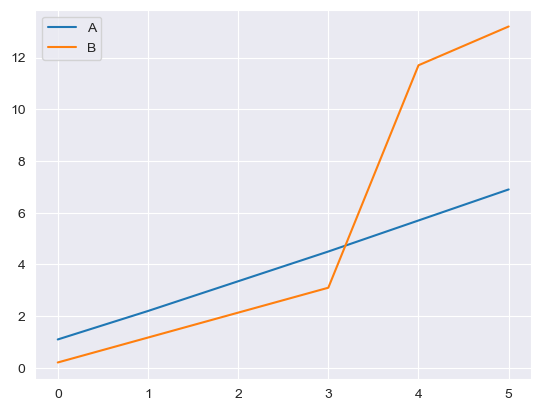

In [40]:
df_interpolate.plot()

其他样式的图形也很简单，指定 `kind=` 参数即可。

<Axes: >

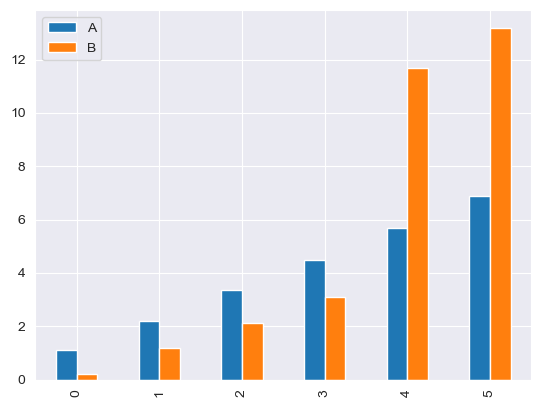

In [41]:
df_interpolate.plot(kind='bar')

更多的图形样式和参数，阅读官方文档中的详细说明。Pandas 绘图虽然不可能做到 Matplotlib 的灵活性，但是其简单易用，适合于数据的快速呈现和预览。

### 其他用法

由于 Pandas 包含的内容实在太多，除了阅读完整的官方文档，很难做到通过一个实验或者一个课程进行全面了解。当然，本课程的目的是带大家熟悉 Pandas 的常用基础方法，至少你大致清楚了 Pandas 是什么，能干什么。

除了上面提到的一些方法和技巧，实际上 Pandas 常用的还有：

- [<i class="fa fa-external-link-square" aria-hidden="true"> 数据计算</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#binary-operator-functions)，例如：`DataFrame.add` 等。
- [<i class="fa fa-external-link-square" aria-hidden="true"> 数据聚合</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#function-application-groupby-window)，例如：`DataFrame.groupby` 等。
- [<i class="fa fa-external-link-square" aria-hidden="true"> 统计分析</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats)，例如：`DataFrame.abs` 等。
- [<i class="fa fa-external-link-square" aria-hidden="true"> 时间序列</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#time-series-related)，例如：`DataFrame.shift` 等。